# Association Rule for Groceries

In [37]:
import pandas as pd

from mlxtend.frequent_patterns import apriori, association_rules

In [43]:
#Read Data
groceries = []

with open("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/8.Association Rules/groceries.csv") as f:
    groceries = f.read()
# print(groceries)

# Analyse the data 

In [45]:
# split each row as transactions

groceries = groceries.split("\n")
len(groceries)

9836

In [48]:
# split each transactions(line) as seperate product by spliting columns

groceries_list =[]

for transaction in groceries:
    groceries_list.append(transaction.split(","))
# print(groceries_list)
# len(groceries_list)

In [49]:
#store all the indivisual products in one single list []

all_groceries_list = [product for transaction in groceries_list for product in transaction]
# print(all_groceries_list)
# len(all_groceries_list)

In [6]:
from collections import Counter
from collections import OrderedDict

item_frequency=Counter(all_groceries_list)
# print(item_frequency)

In [7]:
item_frequency=sorted(item_frequency.items(), key = lambda x:x[1]) 
# print(item_frequency)
len(item_frequency)

170

In [8]:
#Split Items(products) and its frequency

frequencies = list(reversed([i[1] for i in item_frequency]))
items = list(reversed([i[0] for i in item_frequency]))

print(len(frequencies))
print(len(items))

170
170


In [9]:
# Top 10 proucts based on frequency

print(frequencies[0:10])
print(items[0:10])

[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924]
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage']


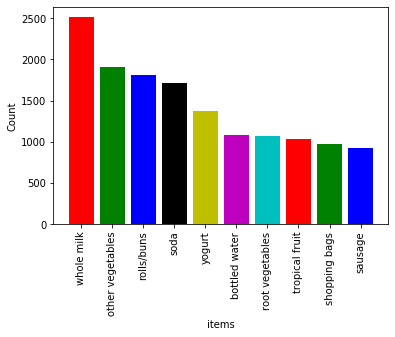

In [10]:
# Visualize the top 10 products 
import matplotlib.pyplot as plt

plt.bar (items[0:10],height = frequencies[0:10],color='rgbkymc')
plt.xticks(list(range(0,10),),items[0:10], rotation = 90)
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [11]:
# Creating Data Frame for the transactions data 
# Purpose of converting all list into Series object Coz to treat each list element as entire element not as separate 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction
groceries_series.columns = ["transactions"]

In [12]:
groceries_series["transactions"]

0       [citrus fruit, semi-finished bread, margarine,...
1                        [tropical fruit, yogurt, coffee]
2                                            [whole milk]
3        [pip fruit, yogurt, cream cheese , meat spreads]
4       [other vegetables, whole milk, condensed milk,...
                              ...                        
9830    [sausage, chicken, beef, hamburger meat, citru...
9831                                  [cooking chocolate]
9832    [chicken, citrus fruit, other vegetables, butt...
9833    [semi-finished bread, bottled water, soda, bot...
9834    [chicken, tropical fruit, other vegetables, vi...
Name: transactions, Length: 9835, dtype: object

In [29]:
X = groceries_series['transactions'].str.join(sep='*')
# now each transaction is like:  fruit*yogurt*cream cheese *meat spreads
# print(X)

# create dummy variable for each 
X= X.str.get_dummies(sep='*')
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Perform Association rule mining

frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

# min_spport = Threshold; max_len = only for the transaction with max 3 products

In [15]:
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, soda, yogurt)"
985,0.007931,"(whipped/sour cream, tropical fruit, whole milk)"
986,0.006202,"(whipped/sour cream, tropical fruit, yogurt)"
987,0.015150,"(whole milk, tropical fruit, yogurt)"


In [16]:
# Most Frequent item sets based on support in decending order
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets

,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
...,...,...
874,0.005084,"(whole milk, newspapers, tropical fruit)"
276,0.005084,"(whole milk, chewing gum)"
332,0.005084,"(frankfurter, coffee)"
346,0.005084,"(curd, cream cheese )"


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2021,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2020,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1312,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2041,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2044,(onions),"(other vegetables, root vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2203,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
2206,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

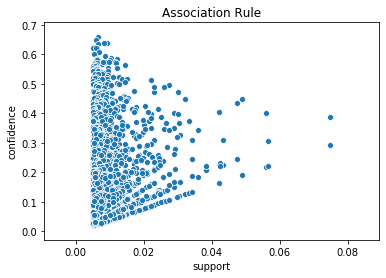

In [19]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule")
plt.show()

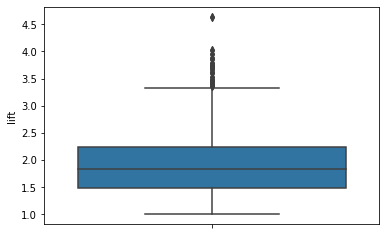

In [20]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

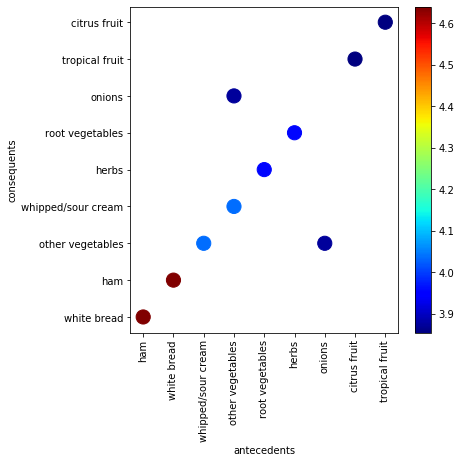

In [21]:
# Top 10

A = rules.antecedents.iloc[0:10]
B = rules.consequents.iloc[0:10]
C = rules.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A = A.apply(lambda x: list(x)[0]).astype("unicode")
B = B.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc = plt.scatter(A,B, s = 200, c=C, cmap=plt.cm.jet)
cbar = fig.colorbar(sc, orientation='vertical')    
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.xticks(rotation=90)
plt.show()

# ii. with different values of support, confidence & length in Apriori

In [22]:
Y = groceries_series['transactions'].str.join(sep='*')
Y= Y.str.get_dummies(sep='*')
Y.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Perform Association rule mining for min_support=0.01 & length = None

frequent_itemsets1 = apriori(Y, min_support=0.01,max_len= None,use_colnames = True)
# Most Frequent item sets based on support in decending order
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
print(frequent_itemsets1)
print("\n\n")

rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1.head(10)

      support                    itemsets
86   0.255516                (whole milk)
55   0.193493          (other vegetables)
66   0.183935                (rolls/buns)
75   0.174377                      (soda)
87   0.139502                    (yogurt)
..        ...                         ...
178  0.010066      (sausage, frankfurter)
306  0.010066  (curd, yogurt, whole milk)
160  0.010066          (curd, rolls/buns)
212  0.010066   (napkins, tropical fruit)
199  0.010066   (whole milk, hard cheese)

[333 rows x 2 columns]





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
588,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
589,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
530,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
535,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
572,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
577,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
371,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
366,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
172,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
173,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366


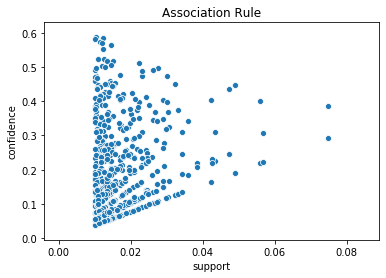

In [24]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule")
plt.show()

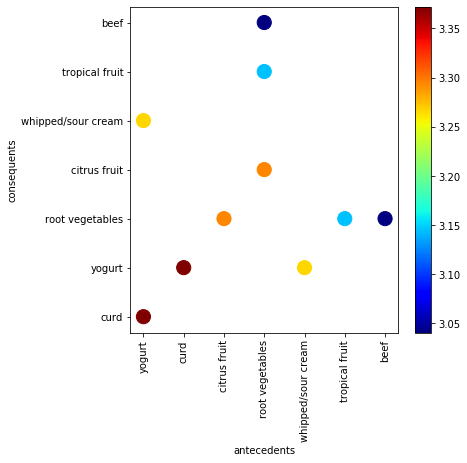

In [25]:
A1 = rules1.antecedents.iloc[0:10]
B1 = rules1.consequents.iloc[0:10]
C1 = rules1.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()